In [1]:
# Import libraries

import numpy as np
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_color_inputs():
    X_train_icub_right = pickle.load(open('E:/training_icub_right.pkl', "rb"))
    X_valid_icub_right = pickle.load(open('E:/validation_icub_right.pkl', "rb"))
    X_test_icub_right = pickle.load(open('E:/testing_icub_right.pkl', "rb"))
    return X_train_icub_right, X_valid_icub_right, X_test_icub_right


def load_outputs():
    y_train = pickle.load(open('E:/y_training.pkl', "rb"))
    y_valid = pickle.load(open('E:/y_validation.pkl', "rb"))
    y_test = pickle.load(open('E:/y_testing.pkl', "rb"))
    return y_train, y_valid, y_test


# Load in X, y data
X_train_icub_right, X_valid_icub_right, X_test_icub_right = load_color_inputs()
y_train_icub_right, y_valid_icub_right, y_test_icub_right = load_outputs()

# Shuffle data
np.random.seed(200)
X_train_icub_right, X_valid_icub_right, X_test_icub_right = np.random.permutation(X_train_icub_right), np.random.permutation(X_valid_icub_right), np.random.permutation(X_test_icub_right)
np.random.seed(200)
y_train_icub_right, y_valid_icub_right, y_test_icub_right = np.random.permutation(y_train_icub_right), np.random.permutation(y_valid_icub_right), np.random.permutation(y_test_icub_right)

In [3]:
clf = MLPClassifier(random_state=1,alpha=0.0001, early_stopping=False, hidden_layer_sizes=(120, 80, 40), learning_rate='adaptive', max_iter=500, activation='tanh', solver='sgd').fit(X_train_icub_right, y_train_icub_right)

C:\Users\kaskn\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
# Test accuracy on Validation set
y_pred = clf.predict(X_valid_icub_right)
print('Accuracy: {:.6f}'.format(accuracy_score(y_valid_icub_right, y_pred)))

Accuracy: 0.970313


In [5]:
# Save Model
pickle.dump(clf, open(r"MLP_icub_right_model", "wb"))

In [6]:
# Load Model
model = pickle.load(open(r"MLP_icub_right_model", "rb"))

In [7]:
# Test accuracy on Test set
y_pred = clf.predict(X_test_icub_right)
print('Accuracy: {:.6f}'.format(accuracy_score(y_test_icub_right, y_pred)))

Accuracy: 0.978125


In [8]:
# Predict the values from the validation dataset and convert predictions classes to one hot vectors
categories = ['Left to right', "Pull", "Push", "Right to left"]
y_pred = model.predict(X_test_icub_right)

print(classification_report(y_test_icub_right, y_pred, target_names=categories, digits=4))

               precision    recall  f1-score   support

Left to right     0.9812    0.9812    0.9812       160
         Pull     0.9748    0.9688    0.9718       160
         Push     0.9873    0.9688    0.9779       160
Right to left     0.9695    0.9938    0.9815       160

     accuracy                         0.9781       640
    macro avg     0.9782    0.9781    0.9781       640
 weighted avg     0.9782    0.9781    0.9781       640



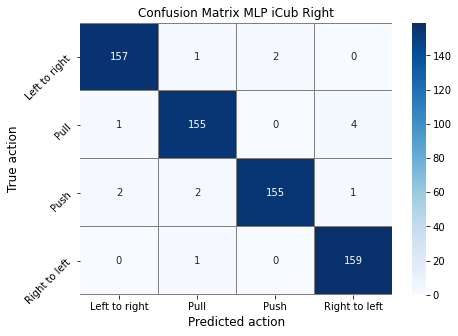

In [9]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test_icub_right, y_pred) 
# plot the confusion matrix
categories = ['Left to right', "Pull", "Push", "Right to left"]
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="grey", fmt= 'g',ax=ax, xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted action", fontsize=12)
plt.ylabel("True action", fontsize=12)
plt.title("Confusion Matrix MLP iCub Right")
locs, labels = plt.yticks()
plt.setp(labels, rotation=45)
plt.show()